In [ ]:
# %pip install -U tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import glob
import random
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, TimeDistributed, LSTM, GlobalAveragePooling2D, Dropout #, RandomContrast, Rescaling, RandomBrightness
#from keras.utils import plot_model
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras import backend as K
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## 2020
## SVREC
root_file1 = '/content/drive/MyDrive/UAS_Beans/Beans_Maturity/2020/SVREC_Mat/f._numpy_data'

data_SVREC_2020=np.load(f"{root_file1}/"'2020_SVREC_6fly_BN.npy')
labels_SVREC_2020=np.load(f"{root_file1}/"'2020_SVREC_ground_6fly_BN.npy')

## 2021
root_file2 = '/content/drive/MyDrive/UAS_Beans/Beans_Maturity/2021/SVREC_Mat/f._numpy_data'

## SVREC
data_SVREC_2021_P1=np.load(f"{root_file2}/"'SVREC_P1/''2021_SVREC_9fly_BN.npy')
labels_SVREC_2021_P1=np.load(f"{root_file2}/"'SVREC_P1/''2021_SVREC_ground_9fly_BN.npy')

## HURON
root_file3 = '/content/drive/MyDrive/UAS_Beans/Beans_Maturity/2021/HURON_Mat/f._numpy_data'

data_HUR_2021=np.load(f"{root_file3}/"'2021_HURON_6fly.npy')
labels_HUR_2021=np.load(f"{root_file3}/"'2021_HURON_ground_6fly.npy')


## 2022
root_file4 = '/content/drive/MyDrive/UAS_Beans/Beans_Maturity/2022/SVREC_Mat/f._numpy_data'

## SVREC
data_SVREC_2022=np.load(f"{root_file4}/"'2022_SVREC_11fly_BN.npy')
labels_SVREC_2022=np.load(f"{root_file4}/"'2022_SVREC_ground_11fly_BN.npy')

## HURON
root_file5 = '/content/drive/MyDrive/UAS_Beans/Beans_Maturity/2022/HURON_Mat/f._numpy_data'

data_HUR_2022=np.load(f"{root_file5}/"'2022_HUR_11fly.npy')
labels_HUR_2022=np.load(f"{root_file5}/"'2022_HUR_ground_9fly.npy')

dim=(64,256)

In [ ]:
y1=pd.DataFrame(labels_SVREC_2020,columns=['Global_ID', 'y'])
y1['i']=1
y2=pd.DataFrame(labels_SVREC_2021_P1,columns=['Global_ID', 'y'])
y2['i']=2
y3=pd.DataFrame(labels_HUR_2021,columns=['Global_ID', 'y'])
y3['i']=3
y4=pd.DataFrame(labels_SVREC_2022,columns=['Global_ID', 'y'])
y4['i']=4
y5=pd.DataFrame(labels_HUR_2022,columns=['Global_ID', 'y'])
y5['i']=5

labels=pd.concat([y1,y2,y3,y4,y5])
labels

,Global_ID,y,i
0,20011001,40,1
1,20011002,40,1
2,20011003,40,1
3,20011004,40,1
4,20011005,40,1
...,...,...,...
127,22242026,36,5
128,22242027,35,5
129,22242028,38,5
130,22242029,37,5


In [ ]:
data_SVREC_2020.shape

(584, 6, 256, 64, 3)

In [ ]:
data_HUR_2021.shape

(84, 6, 256, 64, 3)

In [ ]:
data_SVREC_2021_P1=data_SVREC_2021_P1[:,[2,3,4,5,6,7]]
data_SVREC_2021_P1.shape

(524, 6, 256, 64, 3)

In [ ]:
data_SVREC_2022=data_SVREC_2022[:,[2,4,7,8,9,10]]
data_SVREC_2022.shape

(636, 6, 256, 64, 3)

In [ ]:
data_HUR_2022=data_HUR_2022[:,[2,4,5,7,8,9]]
data_HUR_2022.shape


(132, 6, 256, 64, 3)

In [ ]:
data_all=np.concatenate((data_SVREC_2020, data_SVREC_2021_P1, data_HUR_2021, data_SVREC_2022, data_HUR_2022),axis=0)

seed=7777
x_train, x_test, y_train, y_test = train_test_split(np.array(data_all), np.array(labels), test_size=0.2, random_state=seed)

In [ ]:
y_train_df_ID=pd.DataFrame(y_train,columns=['Global_ID', 'y','i'])
y_test_df_ID=pd.DataFrame(y_test,columns=['Global_ID', 'y','i'])

In [ ]:
y_train = np.delete(y_train, 0, 1)
y_test = np.delete(y_test, 0, 1)


In [ ]:
y_train_df=pd.DataFrame(y_train,columns=['y','i'])
y_test_df=pd.DataFrame(y_test,columns=['y','i'])
y_test=y_test[:,0,None]
y_train=y_train[:,0,None]

print('x_train shape: {}'.format(np.shape(x_train)))
print('y_train shape: {}'.format(np.shape(y_train)))
print('x_test shape: {}'.format(np.shape(x_test)))
print('y_test shape: {}'.format(np.shape(y_test)))

x_train shape: (1568, 6, 256, 64, 3)
y_train shape: (1568, 1)
x_test shape: (392, 6, 256, 64, 3)
y_test shape: (392, 1)


In [ ]:
y_test_df.groupby(['i']).count()

,y
i,
1,124
2,113
3,16
4,113
5,26


In [ ]:
y_train_df.groupby(['i']).count()

,y
i,
1,460
2,411
3,68
4,523
5,106


In [ ]:
def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):
    
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow
        
        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img
    
    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)
        
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

In [ ]:
for k in range(0,int(0.2*x_train.shape[0])): 
    rand1=random.randint(0,x_train.shape[0]-1)
    rand2=random.randint(0,x_train.shape[1]-1)

    rand3=random.randint(0,x_train.shape[0]-1)
    rand4=random.randint(0,x_train.shape[1]-1)

    rand5=random.randint(0,x_train.shape[0]-1)
    rand6=random.randint(0,x_train.shape[1]-1)

    rand7=random.randint(0,x_train.shape[0]-1)
    rand8=random.randint(0,x_train.shape[1]-1)

    rand9=random.randint(0,x_train.shape[0]-1)
    rand10=random.randint(0,x_train.shape[1]-1)

    rand11=random.randint(0,x_train.shape[0]-1)
    rand12=random.randint(0,x_train.shape[1]-1)

    # img = x_train[rand11,rand12]

    # blist = [0, -100, 32,   0,  0, 64] # list of brightness values
    # clist = [0,    0,   0, -12, 64, 64] # list of contrast values

    x_train[rand1,rand2] = apply_brightness_contrast(x_train[rand1,rand2], 0, 0)
    x_train[rand3,rand4] = apply_brightness_contrast(x_train[rand3,rand4], -100, 0)
    x_train[rand5,rand6] = apply_brightness_contrast(x_train[rand5,rand6], 32, 0)
    x_train[rand7,rand8] = apply_brightness_contrast(x_train[rand7,rand8], 0, -12)
    x_train[rand9,rand10] = apply_brightness_contrast(x_train[rand9,rand10], 0, 32)
    x_train[rand11,rand12] = apply_brightness_contrast(x_train[rand11,rand12], 32, 32)

    # images = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
    # imshow(images[0])
    # show()


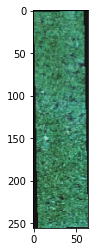

In [ ]:
# rand1=random.randint(0,x_train.shape[0]-1)
# rand2=random.randint(0,x_train.shape[1]-1)
image = x_train[rand7,rand8]

from matplotlib.pyplot import imread,imshow, subplots, show
images = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
imshow(images[0])
show()

In [ ]:
for i in range(0,int(0.2*x_train.shape[0])):# blur
    rand1=random.randint(0,x_train.shape[0]-1)
    rand2=random.randint(0,x_train.shape[1]-1)
    original=x_train[rand1,rand2]
    no_noise = []
    for i in range(len(original)):
        blur = cv2.GaussianBlur(original, (9, 9), 0)
        no_noise.append(blur)
    x_train[rand1,rand2] = no_noise[1]

In [ ]:
# For MLOps
#Install + import Weights and Biases
!pip install --upgrade wandb
import wandb
from wandb import AlertLevel
print("W&B: ", wandb.__version__)
from wandb.keras import WandbCallback

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
W&B:  0.13.5


In [ ]:
#!wandb login --relogin

In [ ]:
os.environ["WANDB_NOTEBOOK_NAME"] = "/content/drive/MyDrive/Colab Notebooks/CopyofHyper_BN_Adjs_CNN_LSTM_Beans_v2.ipynb"
DIR_WEIGTHS = '/content/drive/MyDrive/UAS_Beans/Beans_Maturity/wandb_hyper2'

In [ ]:
#Hyperparameter sweep configuration (more info the the W&B docs)
sweep_config = {
    'method': 'grid', #grid, random (random will continue running until you terminate it or specify a target field for metric)
    'metric': {
      'name': 'train_loss',
      'goal': 'minimize'   
    },
    'parameters': {
        
        'n_filters_cnn1': {
            'values': [16, 32, 64, 128] 
        },
        'n_filters_cnn2': {
            'values': [16, 32, 64, 128] 
        },
        'n_filters_cnn3': {
            'values': [16, 32, 64, 128]
        },
        'n_filters_cnn4': {
            'values': [16, 32, 64, 128]
        },
        'n_delta': {
            'values': [0.01, 0.1, 0.5, 0.8, 1 , 1.5, 2 ]
        
        },
        'n_LSTM': {
            'values': [512, 256, 1024]
        },
        'n_epochs': {
            'values': [100]
        },
        'n_batch': {
            'values': [16, 32, 64]
        },
        'n_lr': {
            'values': [0.001, 0.01, 0.0001] 
        },
        'n_decay': {
            'values': [0.0001, 0.001, 0.01] 
        },
        'f': {
            'values': [3, 4] 
        }
    }
}

#initialize the sweep
#Running this line will ask you to log into your W&B account
sweep_id = wandb.sweep(sweep_config, project="CNN-LSTM-Hyper_MTR_v02")

Create sweep with ID: v8hua75j
Sweep URL: https://wandb.ai/beanlab/CNN-LSTM-Hyper_MTR_v02/sweeps/v8hua75j


In [ ]:
def reset_wandb_env():
    exclude = {
        "WANDB_PROJECT",
        "WANDB_ENTITY",
        "WANDB_API_KEY",
    }
    for k, v in os.environ.items():
        if k.startswith("WANDB_") and k not in exclude:
            del os.environ[k]


In [ ]:
# create a list of configs to try
# [64, 32, 32, 64, 512, 100, 64, 0.001, 0.0001, 4] This configs were selected priviosly
History_all=list()
Model_all=list()
MAE_min_list, Val_MAE_min_list, MSE_min_list, Val_MSE_min_list= [], [], [], []

result=pd.DataFrame()
result_run=pd.DataFrame()
    
def run():

    # Change the current working directory
    os.chdir(DIR_WEIGTHS)

    #Default Hyperparameter values if no sweep is defined
    config_default = {         
    "batch_size": 16,          # input batch size for training (default: 64)
    "test_batch_size": 16,    # input batch size for testing (default: 1000)
    "epochs": 100,             # number of epochs to train (default: 10)
    "lr": 0.005,               # learning rate (default: 0.01)
    "momentum": 0.9,          # SGD momentum (default: 0.5) 
    "no_cuda": False,         # whether to disable CUDA training
    "seed": 42,               # random seed (default: 42)
    "log_interval": 1,      #how many batches to wait before logging in train/test loops
    "image_log_interval": 10,
    "decay": 0.0001
    }
    wandb.init(config=config_default, project="CNN-LSTM-Hyper_MTR_v02", dir = DIR_WEIGTHS )
    config = wandb.config
    tic=time.time()

    model = Sequential()

    model.add(
        TimeDistributed(
            Conv2D(config['n_filters_cnn1'], (config['f'],config['f']), padding='same', strides=(2,2), activation='relu'),
            input_shape = (6, dim[1], dim[0], 3)))

    model.add(
        TimeDistributed( 
            Conv2D(config['n_filters_cnn2'], (config['f'],config['f']), 
                padding='same', strides=(2,2), activation='relu')))

    model.add(
        TimeDistributed(
            MaxPooling2D((2,2), strides=(2,2))))

    model.add(
        TimeDistributed(
            Conv2D(config['n_filters_cnn3'], (config['f'],config['f']),
                padding='same', strides=(2,2), activation='relu')))

    model.add(
        TimeDistributed( 
            Conv2D(config['n_filters_cnn4'], (config['f'],config['f']),
                padding='same', strides=(2,2), activation='relu')))

    model.add(
        TimeDistributed(
            MaxPooling2D((2,2), strides=(2,2))))

    model.add(Dropout(0.2))
    model.add(TimeDistributed(Flatten()))
    # define LSTM model
    model.add(LSTM(config['n_LSTM'], activation='relu'))
    #model.add(Dense(100, activation='relu'))
    model.add(Dense(1))

  
    my_loss = tf.losses.Huber(delta=config['n_delta'])
    model.compile(optimizer=Adam(lr=config['n_lr'],decay=config['n_decay']), loss=my_loss, metrics=['mae','mse']) #loss='mae'
    EarlyStopping(monitor='val_loss', min_delta=0,patience=2, verbose=0, mode='auto')
    #model.summary()

    history=model.fit(x_train, y_train, validation_split=0.1, epochs=config['n_epochs'], batch_size=config['n_batch'], verbose=1, callbacks=[WandbCallback(save_model = False)])

    toc=time.time()
   

    print('Average of MAE in last 100 epochs',np.round(np.mean(history.history['val_loss'][-100:]),3))
    print('Standard Deviation of MAE in last 100 epochs',np.round(np.std(history.history['val_loss'][-100:]),3))

    MAE_min=round(min(history.history['loss']),3)
    Val_MAE_min=round(min(history.history['val_loss']),3)

    MSE_min=round(min(history.history['mse']),3)
    Val_MSE_min=round(min(history.history['val_mse']),3)


    print('Min Train MAE', MAE_min, '- epoch', np.argmin(history.history['loss'])+1)
    print('Min Validation MAE', Val_MAE_min , '- epoch',np.argmin(history.history['val_loss'])+1)
    print('Min Train MSE', MSE_min, '- epoch',np.argmin(history.history['mse'])+1)
    print('Min Validation MSE', Val_MSE_min, '- epoch',np.argmin(history.history['val_mse'])+1)

    print(round(toc-tic,3),' seconds passed')

    History_all.append(history)
    Model_all.append(model)
    MAE_min_list.append(MAE_min)
    Val_MAE_min_list.append(Val_MAE_min)
    MSE_min_list.append(MSE_min)
    Val_MSE_min_list.append(Val_MSE_min)

    # model.save('/content/drive/MyDrive/UAS_Beans/Beans_Maturity/model_mtr/LSTM_model_1000ep_BN_v01')

    # Finish the run
    wandb.finish()
    reset_wandb_env()


In [ ]:
#Run sweep
wandb.agent(sweep_id, run)
print("FINISHED")

wandb: Agent Starting Run: snql6lwx with config:
wandb: 	f: 3
wandb: 	n_LSTM: 256
wandb: 	n_batch: 16
wandb: 	n_decay: 0.001
wandb: 	n_delta: 0.01
wandb: 	n_epochs: 100
wandb: 	n_filters_cnn1: 128
wandb: 	n_filters_cnn2: 64
wandb: 	n_filters_cnn3: 64
wandb: 	n_filters_cnn4: 16
wandb: 	n_lr: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch 1/100
 6/89 [=>............................] - ETA: 5s - loss: 0.1298 - mae: 12.9845 - mse: 278.4632

89/89 [==============================] - 7s 65ms/step - loss: 0.0614 - mae: 6.1490 - mse: 67.6198 - val_loss: 0.0358 - val_mae: 3.5835 - val_mse: 19.2719
Epoch 2/100
89/89 [==============================] - 5s 62ms/step - loss: 0.0424 - mae: 4.2468 - mse: 28.9927 - val_loss: 0.0418 - val_mae: 4.1880 - val_mse: 25.4160
Epoch 3/100
89/89 [==============================] - 5s 62ms/step - loss: 0.0395 - mae: 3.9598 - mse: 24.4925 - val_loss: 0.0490 - val_mae: 4.9008 - val_mse: 31.9900
Epoch 4/100
89/89 [==============================] - 6s 62ms/step - loss: 0.0332 - mae: 3.3269 - mse: 18.0567 - val_loss: 0.0324 - val_mae: 3.2496 - val_mse: 15.8230
Epoch 5/100
89/89 [==============================] - 6s 62ms/step - loss: 0.0293 - mae: 2.9303 - mse: 13.7341 - val_loss: 0.0530 - val_mae: 5.3051 - val_mse: 36.0629
Epoch 6/100
89/89 [==============================] - 6s 62ms/step - loss: 0.0310 - mae: 3.1067 - mse: 14.9896 - val_loss: 0.0260 - val_mae: 2.6068 - val_mse: 10.2808
Epoch 7/100
89/8

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mae,█▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mse,█▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▅█▄▆▃▄▂▂▂▂▁▂▁▁▁▁▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_mae,▅█▄▆▃▄▂▂▂▂▁▂▁▁▁▁▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_mse,▅█▃▅▃▃▂▂▂▁▁▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,95
best_val_loss,0.01285
epoch,99
loss,0.00461


wandb: Agent Starting Run: pjii69w5 with config:
wandb: 	f: 3
wandb: 	n_LSTM: 256
wandb: 	n_batch: 16
wandb: 	n_decay: 0.001
wandb: 	n_delta: 0.05
wandb: 	n_epochs: 100
wandb: 	n_filters_cnn1: 128
wandb: 	n_filters_cnn2: 64
wandb: 	n_filters_cnn3: 64
wandb: 	n_filters_cnn4: 16
wandb: 	n_lr: 0.001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch 1/100
 6/89 [=>............................] - ETA: 5s - loss: 1.2629 - mae: 25.2840 - mse: 900.8711 

89/89 [==============================] - 7s 66ms/step - loss: 0.4067 - mae: 8.1584 - mse: 133.3140 - val_loss: 0.2061 - val_mae: 4.1463 - val_mse: 28.6836
Epoch 2/100
89/89 [==============================] - 6s 62ms/step - loss: 0.2178 - mae: 4.3802 - mse: 31.2330 - val_loss: 0.5832 - val_mae: 11.6885 - val_mse: 150.8043
Epoch 3/100
89/89 [==============================] - 6s 62ms/step - loss: 0.1981 - mae: 3.9866 - mse: 25.3947 - val_loss: 0.2552 - val_mae: 5.1289 - val_mse: 34.8290
Epoch 4/100
89/89 [==============================] - 6s 63ms/step - loss: 0.1732 - mae: 3.4895 - mse: 19.4802 - val_loss: 0.1604 - val_mae: 3.2335 - val_mse: 15.5361
Epoch 5/100
89/89 [==============================] - 6s 63ms/step - loss: 0.1813 - mae: 3.6502 - mse: 20.4129 - val_loss: 0.3533 - val_mae: 7.0914 - val_mse: 60.0600
Epoch 6/100
89/89 [==============================] - 6s 62ms/step - loss: 0.1616 - mae: 3.2570 - mse: 16.8795 - val_loss: 0.2673 - val_mae: 5.3706 - val_mse: 37.2388
Epoch 7/100
8

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mae,█▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mse,█▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▆███▆▄▃▄▅▃▁▃▁▂▁▂▁▁▁▁▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_mae,▆███▆▄▃▄▅▃▁▃▁▂▁▂▁▁▁▁▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_mse,▆▇█▇▅▃▂▃▅▂▁▂▁▂▁▂▁▁▁▁▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,67
best_val_loss,0.07106
epoch,99
loss,0.02416


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: d8q23hk1 with config:
wandb: 	f: 3
wandb: 	n_LSTM: 256
wandb: 	n_batch: 16
wandb: 	n_decay: 0.001
wandb: 	n_delta: 3
wandb: 	n_epochs: 100
wandb: 	n_filters_cnn1: 128
wandb: 	n_filters_cnn2: 64
wandb: 	n_filters_cnn3: 64
wandb: 	n_filters_cnn4: 16
wandb: 	n_lr: 0.001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch 1/100
 6/89 [=>............................] - ETA: 5s - loss: 64.2722 - mae: 22.8846 - mse: 877.3885 

89/89 [==============================] - 7s 67ms/step - loss: 18.1205 - mae: 7.3851 - mse: 118.0414 - val_loss: 13.4836 - val_mae: 5.8865 - val_mse: 46.5530
Epoch 2/100
89/89 [==============================] - 6s 62ms/step - loss: 7.8885 - mae: 3.8951 - mse: 24.5554 - val_loss: 17.0753 - val_mae: 7.1484 - val_mse: 63.7643
Epoch 3/100
89/89 [==============================] - 6s 62ms/step - loss: 6.2725 - mae: 3.2993 - mse: 17.6866 - val_loss: 17.1620 - val_mae: 7.1928 - val_mse: 61.4598
Epoch 4/100
89/89 [==============================] - 6s 62ms/step - loss: 4.6811 - mae: 2.7054 - mse: 11.8599 - val_loss: 6.1984 - val_mae: 3.3259 - val_mse: 16.0043
Epoch 5/100
89/89 [==============================] - 6s 63ms/step - loss: 4.5142 - mae: 2.6433 - mse: 11.3796 - val_loss: 4.9055 - val_mae: 2.8507 - val_mse: 11.6859
Epoch 6/100
89/89 [==============================] - 6s 63ms/step - loss: 4.0783 - mae: 2.4864 - mse: 9.8833 - val_loss: 2.9833 - val_mae: 2.0358 - val_mse: 6.6697
Epoch 7/100
8

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mae,█▄▃▃▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mse,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▆█▂▃▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_mae,▆█▂▃▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_mse,▆█▁▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,49
best_val_loss,1.47831
epoch,99
loss,0.12216


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: zwz8tl18 with config:
wandb: 	f: 3
wandb: 	n_LSTM: 256
wandb: 	n_batch: 16
wandb: 	n_decay: 0.001
wandb: 	n_delta: 5
wandb: 	n_epochs: 100
wandb: 	n_filters_cnn1: 128
wandb: 	n_filters_cnn2: 64
wandb: 	n_filters_cnn3: 64
wandb: 	n_filters_cnn4: 16
wandb: 	n_lr: 0.001
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch 1/100
 6/89 [=>............................] - ETA: 5s - loss: 129.6386 - mae: 28.3806 - mse: 1363.6771

89/89 [==============================] - 7s 66ms/step - loss: 26.8287 - mae: 7.4391 - mse: 145.4323 - val_loss: 25.4967 - val_mae: 7.3822 - val_mse: 70.1569
Epoch 2/100
89/89 [==============================] - 6s 62ms/step - loss: 9.4886 - mae: 3.7207 - mse: 22.2640 - val_loss: 13.4790 - val_mae: 4.6851 - val_mse: 32.0983
Epoch 3/100
89/89 [==============================] - 6s 63ms/step - loss: 7.4784 - mae: 3.2353 - mse: 16.5567 - val_loss: 14.6795 - val_mae: 4.9819 - val_mse: 34.4935
Epoch 4/100
89/89 [==============================] - 6s 62ms/step - loss: 7.2151 - mae: 3.1487 - mse: 15.9011 - val_loss: 17.2059 - val_mae: 5.6660 - val_mse: 41.3103
Epoch 5/100
89/89 [==============================] - 6s 62ms/step - loss: 5.0257 - mae: 2.5855 - mse: 10.4494 - val_loss: 6.0419 - val_mae: 2.7821 - val_mse: 13.1358
Epoch 6/100
89/89 [==============================] - 6s 62ms/step - loss: 3.8340 - mae: 2.2063 - mse: 7.8719 - val_loss: 3.3081 - val_mae: 2.1125 - val_mse: 6.7083
Epoch 7/100


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mae,█▄▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mse,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▅▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_mae,█▅▂▂▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_mse,█▄▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,91
best_val_loss,1.56983
epoch,99
loss,0.18651


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


FINISHED


In [ ]:
def model_configs():
    # define scope of configs
    n_filters_cnn1 = [64]
    n_filters_cnn2 = [32, 16, 64, 128]
    n_filters_cnn3 = [32, 16, 64, 128]
    n_filters_cnn4 = [64, 16, 32, 128]
    n_LSTM = [512]
    n_epochs = [100]
    n_batch = [32]
    n_lr = [0.001]
    n_decay = [0.001]
    f=[3]
    # create configs
    configs = list()
    for a in n_filters_cnn1:
        for b in n_filters_cnn2:
            for c in n_filters_cnn3:
                for d in n_filters_cnn4:
                  for e in n_delta:
                    for f in n_LSTM:
                        for g in n_epochs:
                            for h in n_batch:
                                for i in n_lr:
                                    for j in n_decay:
                                        for k in f:
                                            cfg=[a,b,c,d,e,f,g,h,i,j,k] 
                                            configs.append(cfg)
    print('Total configs: %d' % len(configs))
    return configs

cfg_list=model_configs()
cfg_list
cfg_list=pd.DataFrame(cfg_list)

Total configs: 64


In [ ]:
result=pd.DataFrame({
                    'MAE_min':MAE_min_list,
                    'Val_MAE_min':Val_MAE_min_list,
                    'MSE_min':MSE_min_list,
                    'Val_MSE_min':Val_MSE_min_list})  

In [ ]:
#result = pd.read_csv('/content/drive/MyDrive/UAS_Beans/Beans_Maturity/results_hyper/result_v01.csv')

In [ ]:
result2 = pd.concat([cfg_list.reset_index(drop=True),result.reset_index(drop=True)], axis = 1, ignore_index=True)

In [ ]:
result2.columns = ['n_filters_cnn1', 'n_filters_cnn1', 'n_filters_cnn1', 'n_filters_cnn1', 'n_delta', 'n_LSTM' , 'n_epochs', 'n_batch', 'n_lr', 'n_decay', 'f', 'MAE_min', 'Val_MAE_min', 'MSE_min', 'Val_MSE_min']

In [ ]:
result2.to_csv('/content/drive/MyDrive/UAS_Beans/Beans_Maturity/results_hyper2/CNN-LSTM-Hyper_MTR_v02.csv', index = False)
result2

In [ ]:
# wandb.init(project="CNN-LSTM-Hyper_MTR_v02", dir = DIR_WEIGTHS )

# wandb.log({"result": result2})

# wandb.finish()